In [4]:
import spacy
nlp = spacy.load("en_core_web_sm")

columns_to_process = ['Title', 'Additional notes', 'Cause, Motive']

for col in columns_to_process:
    print(f"\nProcessing column: {col}")
    
    lemmatized_col = []
    pos_tags_col = []

    for doc in nlp.pipe(honour_killing_data[col].astype(str).fillna(''), disable=["ner"]):
        lemmatized = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
        pos_tags = [(token.text, token.pos_) for token in doc if token.is_alpha]

        lemmatized_col.append(lemmatized)
        pos_tags_col.append(pos_tags)

    honour_killing_data[f'{col}_lemmatized'] = lemmatized_col
    honour_killing_data[f'{col}_POS'] = pos_tags_col



Processing column: Title

Processing column: Additional notes

Processing column: Cause, Motive


In [5]:
honour_killing_data.to_excel("honour_killing_processed.xlsx", index=False)


In [13]:
df = pd.read_excel("honour_killing_processed.xlsx").head()


In [21]:
selected_columns = ['Title_lemmatized','Additional notes_lemmatized', 'Cause, Motive_lemmatized']

In [25]:

# Combine the text from the selected columns row-wise, then all rows into one large string
combined_text = " ".join(df[col].astype(str).str.cat(sep=" ") for col in selected_columns)


from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Apply NLP
doc = nlp(combined_text)

# Filter out unwanted tokens
filtered_tokens = [
    token.lemma_.lower() 
    for token in doc 
    if not token.is_stop and not token.is_punct 
    and token.ent_type_ not in ("PERSON", "ORG", "GPE")
    and token.pos_ in ("NOUN", "ADJ", "VERB")
]

#Remove specific unwanted word(s)
filtered_tokens = [token for token in filtered_tokens if token != "orangi"]



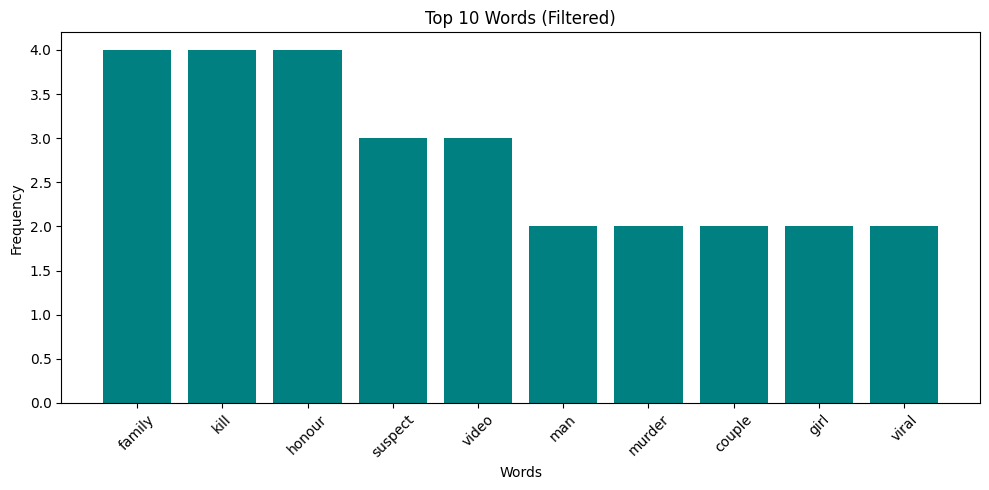

In [26]:
# Word frequency
word_freq = Counter(filtered_tokens)

# Top 10 bar chart
top_words = word_freq.most_common(10)
words, counts = zip(*top_words)

plt.figure(figsize=(10,5))
plt.bar(words, counts, color='teal')
plt.title("Top 10 Words (Filtered)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

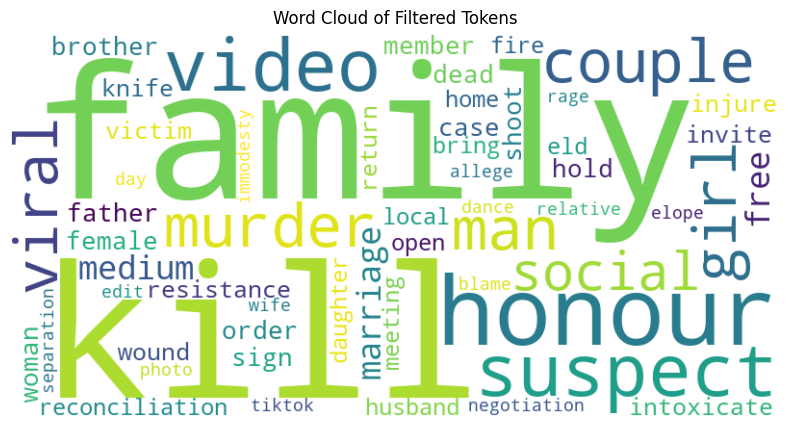

In [27]:
# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Filtered Tokens")
plt.show()